In [37]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

# Connect to my database
# Database connection parameters
conn = psycopg2.connect(
    host="",
    port="",  
    database="",  
    user="",  
    password=""  
)

cursor = conn.cursor()


In [38]:
# Queries to get oregon offense data
query = """
SELECT date, raw_location, opponent, result,
       passing_cmp, passing_att, completion_pct, passing_yds, passing_td, 
       rushing_att, rushing_yds, rushing_avg, rushing_td, total_plays, total_yards, avg_yds,
       pass_first_downs, rush_first_downs, first_down_pens, total_first_downs, 
       total_penalties, total_penalties_yds, total_fum, total_int, total_to,
       temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM Oregon_Offensive_Stats;
"""

oregon_data = pd.read_sql(query, conn)


oregon_data.head()

,date,raw_location,opponent,result,passing_cmp,passing_att,completion_pct,passing_yds,passing_td,rushing_att,...,total_penalties,total_penalties_yds,total_fum,total_int,total_to,temp_f,precipitation_in,windspeed_mph,altitude_m,distance_from
0,2022-11-05,@,Colorado,W (49-10),22,27,81.5,284,3,39,...,4,40,0,0,0,57.8,0.067,6.8,1655.0,955.42
1,2022-11-12,H,Washington,L (34-37),19,28,67.9,279,2,51,...,7,51,1,0,1,41.7,0.002,4.7,131.0,0.00
2,2022-11-19,H,Utah,W (20-17),25,37,67.6,287,1,25,...,6,60,2,1,3,32.1,0.000,3.2,131.0,0.00
3,2022-11-26,@,Oregon State,L (34-38),27,41,65.9,327,2,42,...,7,58,0,0,0,39.7,0.000,3.0,72.0,36.43
4,2022-12-28,N,North Carolina*,W (28-27),23,30,76.7,205,2,32,...,5,39,0,1,1,60.2,0.467,6.2,19.0,845.00


In [39]:

# distance ranges 
bins = [0, 500, 1000, 1500, 4000]
labels = ['<500', '500-1000', '1000-1500', '1500+']

# new column for distance categories
oregon_data['Distance_Range'] = pd.cut(oregon_data['distance_from'], bins=bins, labels=labels, right=False)

# Group by distance range and calculate mean values for the metrics
distance_grouped = oregon_data.groupby('Distance_Range').agg({
    'passing_yds': 'mean',
    'rushing_yds': 'mean',
    'total_yards': 'mean',
    'completion_pct': 'mean',
    'passing_td': 'mean',
    'rushing_att': 'mean',
    'passing_att': 'mean',   # Include passing_att here
    'rushing_td': 'mean',
    'total_first_downs': 'mean',
    'total_to': 'mean'
}).reset_index()


distance_grouped.head()


,Distance_Range,passing_yds,rushing_yds,total_yards,completion_pct,passing_td,rushing_att,passing_att,rushing_td,total_first_downs,total_to
0,<500,272.173469,231.408163,503.581633,67.504082,2.520408,41.663265,30.204082,2.622449,25.000000,1.132653
1,500-1000,256.428571,186.464286,442.892857,64.267857,2.321429,37.500000,31.357143,2.357143,22.892857,1.250000
2,1000-1500,241.250000,209.750000,451.000000,65.725000,1.000000,35.500000,36.000000,3.250000,22.000000,0.750000
3,1500+,254.875000,185.125000,440.000000,59.625000,1.500000,37.375000,36.250000,2.250000,22.875000,1.000000


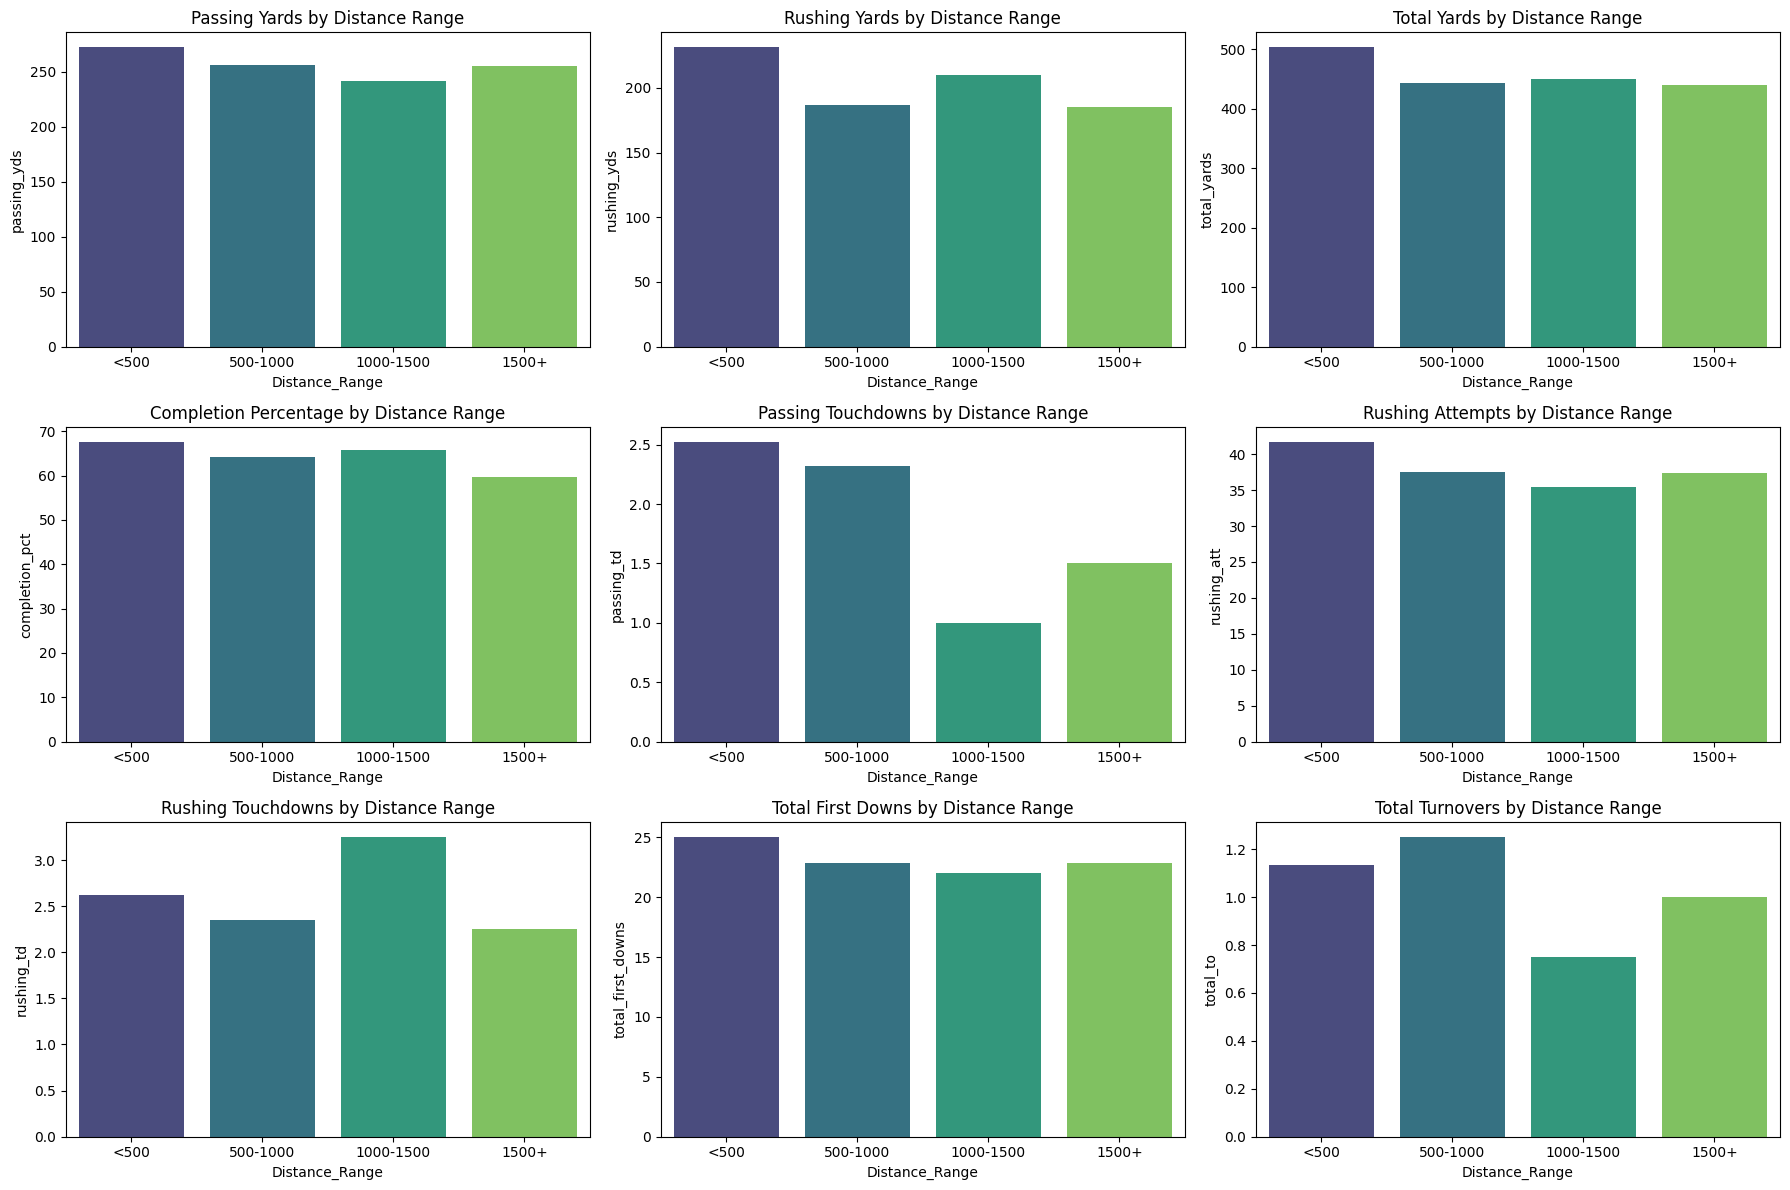

In [40]:

fig, axs = plt.subplots(3, 3, figsize=(18, 12))

# Passing Yards
sns.barplot(x='Distance_Range', y='passing_yds', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 0], legend=False)
axs[0, 0].set_title('Passing Yards by Distance Range')

# Rushing Yards
sns.barplot(x='Distance_Range', y='rushing_yds', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 1], legend=False)
axs[0, 1].set_title('Rushing Yards by Distance Range')

# Total Yards
sns.barplot(x='Distance_Range', y='total_yards', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 2], legend=False)
axs[0, 2].set_title('Total Yards by Distance Range')

# Completion Percentage
sns.barplot(x='Distance_Range', y='completion_pct', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 0], legend=False)
axs[1, 0].set_title('Completion Percentage by Distance Range')

# Passing Touchdowns
sns.barplot(x='Distance_Range', y='passing_td', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 1], legend=False)
axs[1, 1].set_title('Passing Touchdowns by Distance Range')

# Rushing Attempts
sns.barplot(x='Distance_Range', y='rushing_att', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 2], legend=False)
axs[1, 2].set_title('Rushing Attempts by Distance Range')

# Rushing Touchdowns
sns.barplot(x='Distance_Range', y='rushing_td', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 0], legend=False)
axs[2, 0].set_title('Rushing Touchdowns by Distance Range')

# Total First Downs
sns.barplot(x='Distance_Range', y='total_first_downs', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 1], legend=False)
axs[2, 1].set_title('Total First Downs by Distance Range')

# Total Turnovers
sns.barplot(x='Distance_Range', y='total_to', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 2], legend=False)
axs[2, 2].set_title('Total Turnovers by Distance Range')

# Adjust layout
plt.tight_layout()
plt.show()



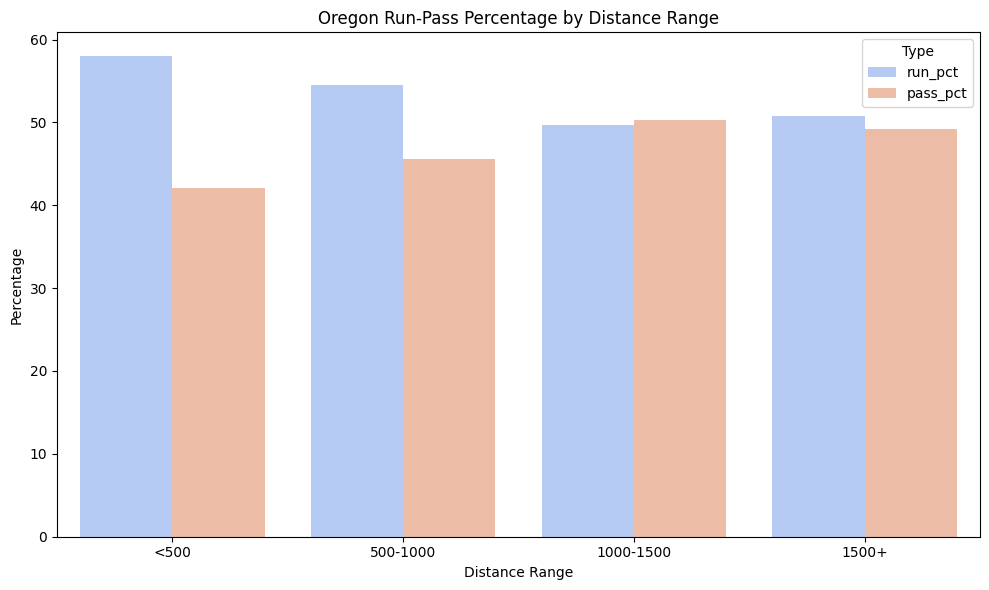

In [42]:
# Calculate Run-Pass Percentage
distance_grouped['run_pct'] = distance_grouped['rushing_att'] / (distance_grouped['rushing_att'] + distance_grouped['passing_att']) * 100
distance_grouped['pass_pct'] = distance_grouped['passing_att'] / (distance_grouped['rushing_att'] + distance_grouped['passing_att']) * 100


fig, ax = plt.subplots(figsize=(10, 6))

# Plot Run and Pass Percentages side by side
distance_grouped_melted = pd.melt(distance_grouped, id_vars=['Distance_Range'], value_vars=['run_pct', 'pass_pct'], var_name='Type', value_name='Percentage')

sns.barplot(x='Distance_Range', y='Percentage', hue='Type', data=distance_grouped_melted, palette='coolwarm')

# titles and labels
ax.set_title('Oregon Run-Pass Percentage by Distance Range')
ax.set_ylabel('Percentage')
ax.set_xlabel('Distance Range')


plt.tight_layout()
plt.show()

In [ ]:
# Prepare the data
X = oregon_data[['distance_from']].dropna()  
y = oregon_data['total_yards'].dropna()      

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values using the model
y_pred = model.predict(X)

# Visualize the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=oregon_data['distance_from'], y=oregon_data['total_yards'], label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Total Yards vs Distance From')
plt.xlabel('Distance From (miles)')
plt.ylabel('Total Yards')
plt.legend()
plt.show()

# Print the regression coefficient and intercept
print(f"Regression Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")


In [12]:
import pandas as pd
import numpy as np

# Assume the DataFrame 'team_data' contains the team's game data
# 'distance_from' column holds the distance in miles
# 'result' column contains the result in the format 'W (56-19)' or 'L (19-56)'

# Step 1: Create distance bins
distance_bins = [0, 500, 1000, 1500, float('inf')]
distance_labels = ['<500 miles', '500-1000 miles', '1000-1500 miles', '1500+ miles']

# Step 2: Categorize games into the bins
oregon_data['Distance_Range'] = pd.cut(oregon_data['distance_from'], bins=distance_bins, labels=distance_labels)

# Step 3: Create a win column (1 for win, 0 for loss)
# We extract the first character of the 'result' column ('W' or 'L') to determine win or loss
oregon_data['win'] = oregon_data['result'].apply(lambda x: 1 if x.strip()[0] == 'W' else 0)

# Step 4: Group by the distance bins and calculate total wins and games played
distance_grouped = oregon_data.groupby('Distance_Range').agg(
    total_games=('win', 'count'),
    total_wins=('win', 'sum')
)

# Step 5: Calculate win percentage
distance_grouped['win_percentage'] = (distance_grouped['total_wins'] / distance_grouped['total_games']) * 100

# Step 6: Display the results
print(distance_grouped)


                 total_games  total_wins  win_percentage
Distance_Range                                          
<500 miles                28          16       57.142857
500-1000 miles            28          19       67.857143
1000-1500 miles            4           2       50.000000
1500+ miles                8           2       25.000000


In [ ]:


distance_grouped.reset_index(inplace=True) 


plt.figure(figsize=(10, 6))
sns.lineplot(x='Distance_Range', y='win_percentage', data=distance_grouped, marker='o', linewidth=2, markersize=10, color='b')


plt.xlabel('Distance Range')
plt.ylabel('Win Percentage (%)')
plt.title('Oregon Win Percentage by Distance Range')


plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:

fig, axs = plt.subplots(3, 3, figsize=(18, 12))

# labels for the Distance Range
distance_labels = ['0', '500', '1000', '1500+']

# Passing Yards
sns.lineplot(x='Distance_Range', y='passing_yds', data=distance_grouped, marker='o', ax=axs[0, 0])
axs[0, 0].set_title('Passing Yards by Distance Range')
axs[0, 0].set_xticklabels(distance_labels)

# Rushing Yards
sns.lineplot(x='Distance_Range', y='rushing_yds', data=distance_grouped, marker='o', ax=axs[0, 1], color = 'green')
axs[0, 1].set_title('Oregon Rushing Yards/ Game by Distance (miles)')
axs[0, 1].set_xticklabels(distance_labels)

# Total Yards
sns.lineplot(x='Distance_Range', y='total_yards', data=distance_grouped, marker='o', ax=axs[0, 2])
axs[0, 2].set_title('Total Yards by Distance Range')
axs[0, 2].set_xticklabels(distance_labels)

# Completion Percentage
sns.lineplot(x='Distance_Range', y='completion_pct', data=distance_grouped, marker='o', ax=axs[1, 0])
axs[1, 0].set_title('Completion Percentage by Distance Range')
axs[1, 0].set_xticklabels(distance_labels)

# Passing Touchdowns
sns.lineplot(x='Distance_Range', y='passing_td', data=distance_grouped, marker='o', ax=axs[1, 1])
axs[1, 1].set_title('Passing Touchdowns by Distance Range')
axs[1, 1].set_xticklabels(distance_labels)

# Rushing Attempts
sns.lineplot(x='Distance_Range', y='rushing_att', data=distance_grouped, marker='o', ax=axs[1, 2])
axs[1, 2].set_title('Rushing Attempts by Distance Range')
axs[1, 2].set_xticklabels(distance_labels)

# Rushing Touchdowns
sns.lineplot(x='Distance_Range', y='rushing_td', data=distance_grouped, marker='o', ax=axs[2, 0])
axs[2, 0].set_title('Rushing Touchdowns by Distance Range')
axs[2, 0].set_xticklabels(distance_labels)

# Total First Downs
sns.lineplot(x='Distance_Range', y='total_first_downs', data=distance_grouped, marker='o', ax=axs[2, 1])
axs[2, 1].set_title('Total First Downs by Distance Range')
axs[2, 1].set_xticklabels(distance_labels)

# Total Turnovers
sns.lineplot(x='Distance_Range', y='total_to', data=distance_grouped, marker='o', ax=axs[2, 2])
axs[2, 2].set_title('Total Turnovers by Distance Range')
axs[2, 2].set_xticklabels(distance_labels)


plt.tight_layout()
plt.show()


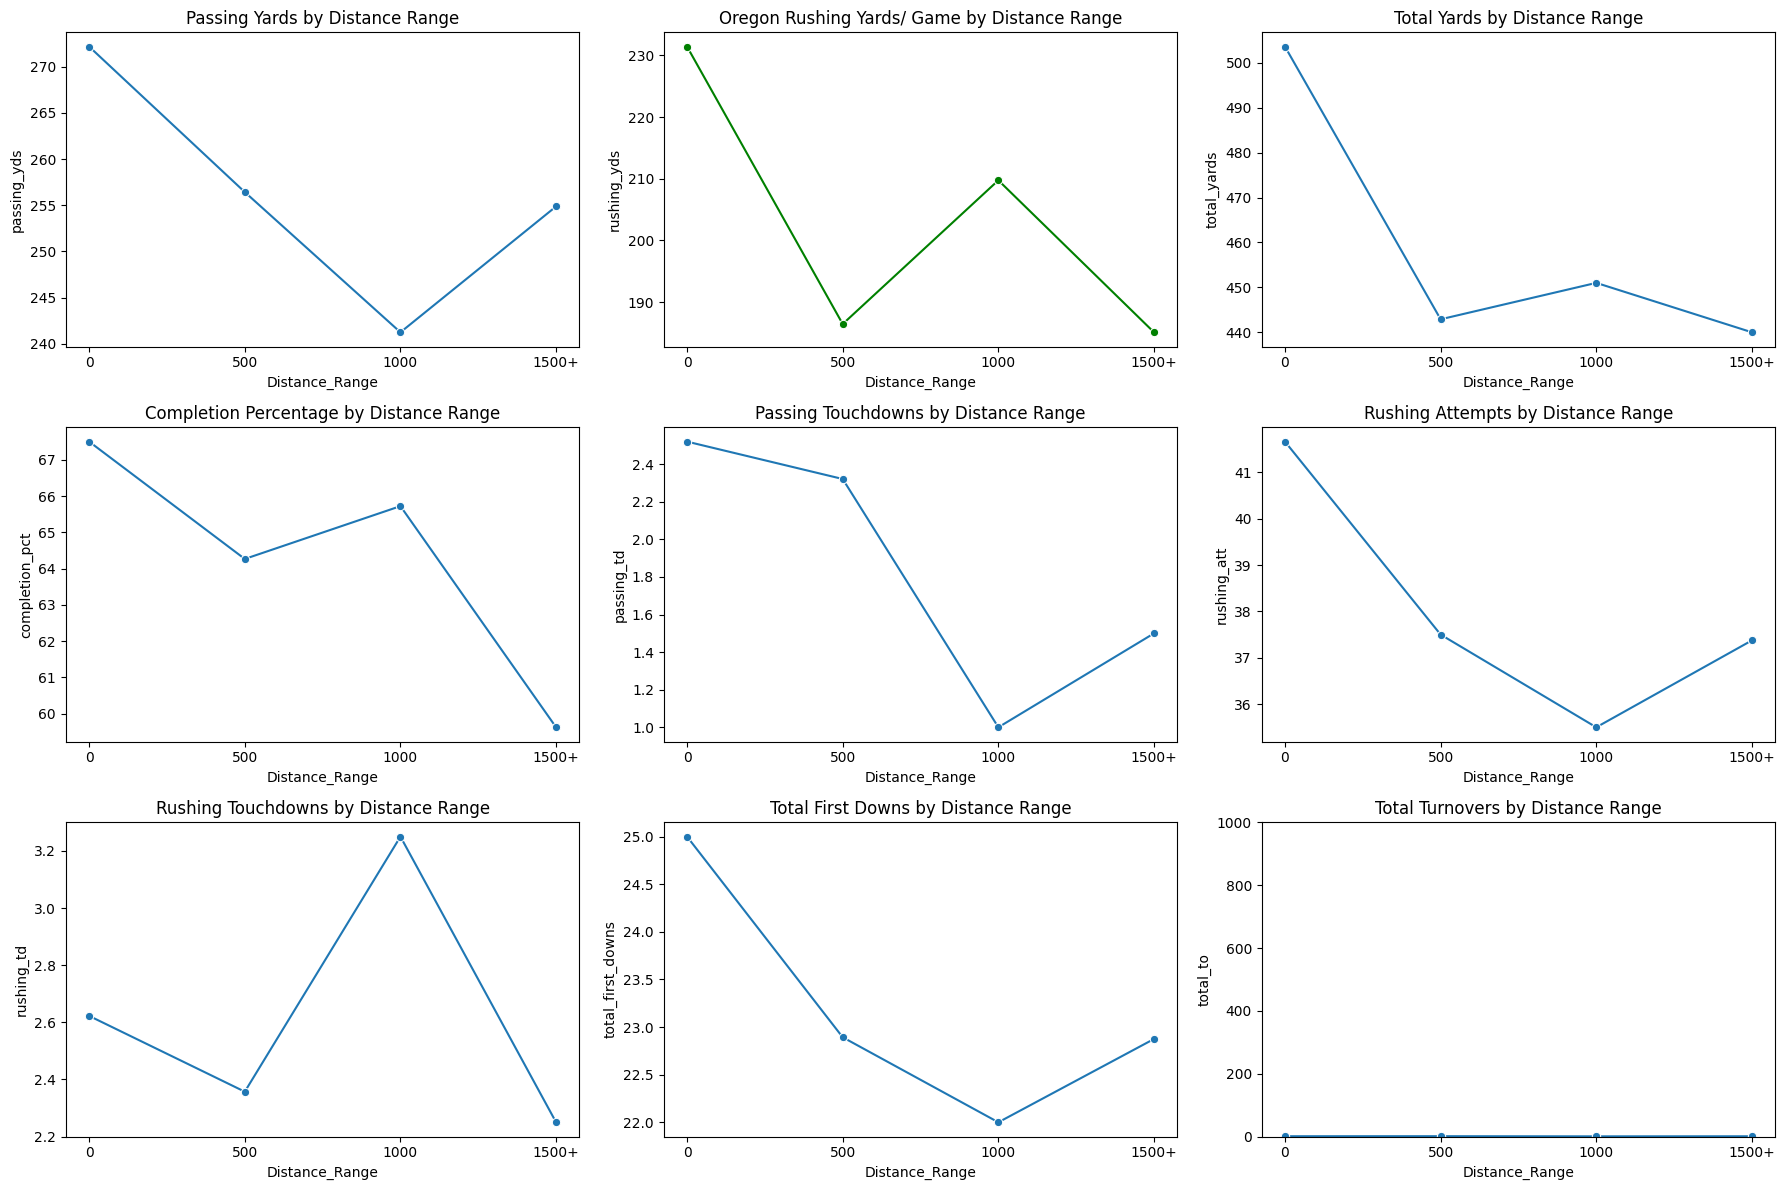

In [28]:

# Distance_Range bins
distance_bins = [0, 500, 1000, 1500, float('inf')]
distance_labels = ['0', '500', '1000', '1500+']

# Add a Distance_Range column to the DataFrame
oregon_data['Distance_Range'] = pd.cut(oregon_data['distance_from'], bins=distance_bins, labels=distance_labels, right=False)


distance_grouped = oregon_data.groupby('Distance_Range').agg({
    'passing_yds': 'mean',
    'rushing_yds': 'mean',
    'total_yards': 'mean',
    'completion_pct': 'mean',
    'passing_td': 'mean',
    'rushing_att': 'mean',
    'rushing_td': 'mean',
    'total_first_downs': 'mean',
    'total_to': 'mean'
}).reset_index()


fig, axs = plt.subplots(3, 3, figsize=(18, 12))

# Passing Yards
sns.lineplot(x='Distance_Range', y='passing_yds', data=distance_grouped, marker='o', ax=axs[0, 0])
axs[0, 0].set_title('Passing Yards by Distance Range')

# Rushing Yards
sns.lineplot(x='Distance_Range', y='rushing_yds', data=distance_grouped, marker='o', ax=axs[0, 1], color = 'green')
axs[0, 1].set_title('Oregon Rushing Yards/ Game by Distance Range')

# Total Yards
sns.lineplot(x='Distance_Range', y='total_yards', data=distance_grouped, marker='o', ax=axs[0, 2])
plt.ylim(0,1000)
axs[0, 2].set_title('Total Yards by Distance Range')

# Completion Percentage
sns.lineplot(x='Distance_Range', y='completion_pct', data=distance_grouped, marker='o', ax=axs[1, 0])
axs[1, 0].set_title('Completion Percentage by Distance Range')

# Passing Touchdowns
sns.lineplot(x='Distance_Range', y='passing_td', data=distance_grouped, marker='o', ax=axs[1, 1])
axs[1, 1].set_title('Passing Touchdowns by Distance Range')

# Rushing Attempts
sns.lineplot(x='Distance_Range', y='rushing_att', data=distance_grouped, marker='o', ax=axs[1, 2])
axs[1, 2].set_title('Rushing Attempts by Distance Range')

# Rushing Touchdowns
sns.lineplot(x='Distance_Range', y='rushing_td', data=distance_grouped, marker='o', ax=axs[2, 0])
axs[2, 0].set_title('Rushing Touchdowns by Distance Range')

# Total First Downs
sns.lineplot(x='Distance_Range', y='total_first_downs', data=distance_grouped, marker='o', ax=axs[2, 1])
axs[2, 1].set_title('Total First Downs by Distance Range')

# Total Turnovers
sns.lineplot(x='Distance_Range', y='total_to', data=distance_grouped, marker='o', ax=axs[2, 2])
axs[2, 2].set_title('Total Turnovers by Distance Range')


plt.tight_layout()
plt.show()
